In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

# Load the dataset
data = pd.read_csv('twitter_training.csv')

# Display the first few rows of the dataset to understand its structure
print(data.head())


   2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

  im getting on borderlands and i will murder you all ,  
0  I am coming to the borders and I will kill you...     
1  im getting on borderlands and i will kill you ...     
2  im coming on borderlands and i will murder you...     
3  im getting on borderlands 2 and i will murder ...     
4  im getting into borderlands and i can murder y...     


In [3]:
# Perform sentiment analysis using TextBlob on the '2401' column
data['Sentiment'] = data['2401'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Classify sentiment into positive, negative, and neutral
data['Sentiment_Label'] = data['Sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))


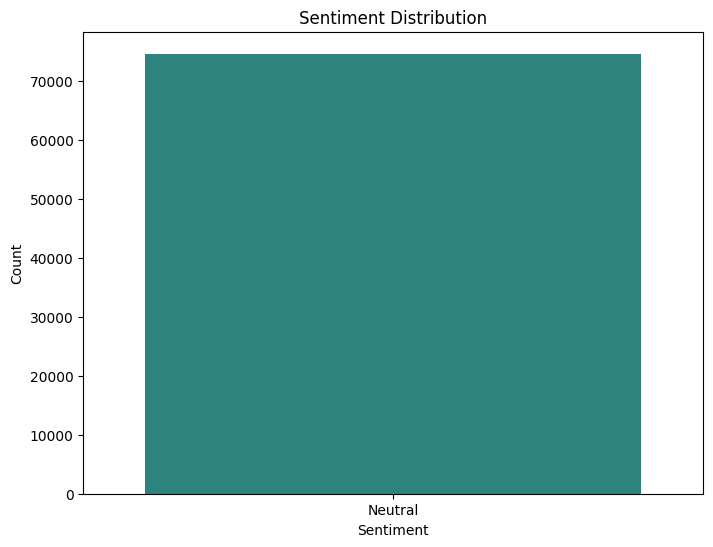

In [4]:
# Visualize sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment_Label', data=data, palette='viridis')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()


/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1400: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


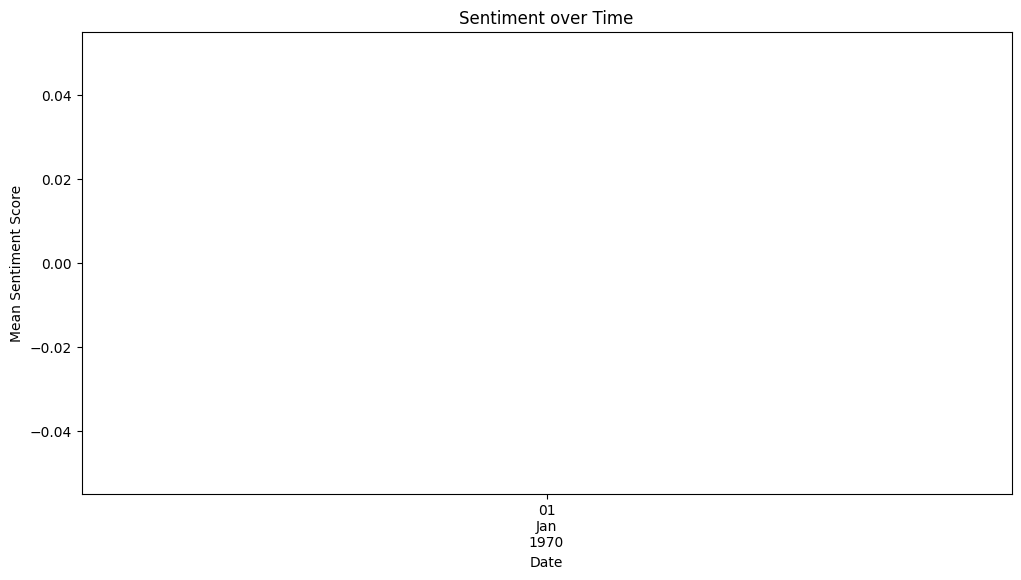

In [6]:
# Assuming '2401' is the text column and 'Sentiment' is the calculated sentiment column
# Convert the index to datetime (assuming it represents time)
data.index = pd.to_datetime(data.index)

# Resample data by day and calculate mean sentiment score for each day
daily_sentiment = data['Sentiment'].resample('D').mean().fillna(0)  # Fill NaN values with 0 for visualization

# Visualize sentiment over time
plt.figure(figsize=(12, 6))
daily_sentiment.plot()
plt.xlabel('Date')
plt.ylabel('Mean Sentiment Score')
plt.title('Sentiment over Time')
plt.show()
